# By Adrian Abeyta and Noemi Turner
CPSC 322, Spring 2022

## Introduction  
This dataset has the top 10 earning athletes from every year, along with the amount of money they earned, their nationality, the sport they played, their current rank on the top 10, and their previous rank. We were trying to classify what category an athlete would end up in after we discretized the money earned into 3 categories, low, medium, and high.

In [76]:
import importlib
import numpy as np

import utils
importlib.reload(utils)
import plot_utils as pu
importlib.reload(pu)
from mysklearn import myutils
importlib.reload(myutils)
from mypytable import MyPyTable
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [77]:
data = MyPyTable()
data.load_from_file("input_data/forbes_data.csv")

## Data Analysis  
The attributes we used were nationality, sport, and earnings_($ million). We had to convert the earnings attribute to a categorical attribute since we chose it as the class label. To do this, we used the cupute_equal_bin_cutoffs function to find where to split the dataset equally into thirds. Then we split the train and test set with the bootstrap method to test our classifiers. There are 301 instances in the dataset. The attribute we chose as the label was the earnings.

### Clean Data

In [63]:
num_rows, num_cols = data.get_shape()
data.convert_to_numeric()
y_data = utils.discritize_data_by_million(data)


## Summary Statistics  
When comparing the two summary graphs below, it is clear that there is some correlation between boxing and the usa. One thing that makes this dataset more difficult is that each country and sport are not equally represented throughout the dataset. This makes it harder for our classifiers to classify countries and sports that are only represented by 1 athlete. 

### Split Data

In [64]:
combined_data = []
sport = utils.get_column(data.data, data.column_names, "Sport")
country = utils.get_column(data.data, data.column_names, "Nationality")
for i in range(len(sport)):
    country[i] = country[i].lower()
    sport[i] = sport[i].lower()
    combined_data.append([country[i], sport[i]])
X_train, X_test, y_train, y_true = myevaluation.bootstrap_sample(combined_data, y=y_data)

## Data Visualizations

### Sport

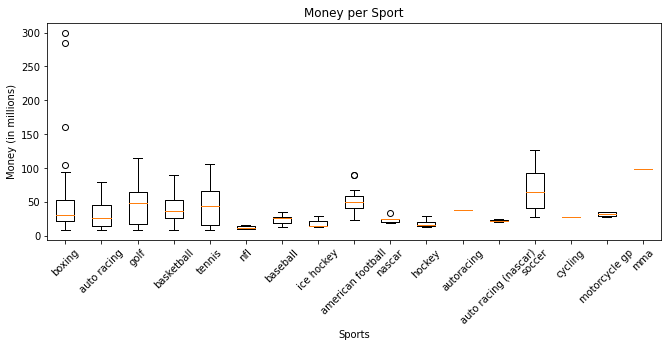

In [65]:
data.remove_rows_with_missing_values()
sports = data.get_column("Sport")
money = data.get_column("earnings_($ million)")
for i in range(len(sports)):
    sports[i] = sports[i].lower()
sports_split = utils.split_string_count(sports)
unique_sports = utils.get_genres(sports_split)
total_scores = utils.divide_ratings(unique_sports, sports, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_box_plot(total_scores, unique_sports, "Sports", "Money (in millions)", "Money per Sport")

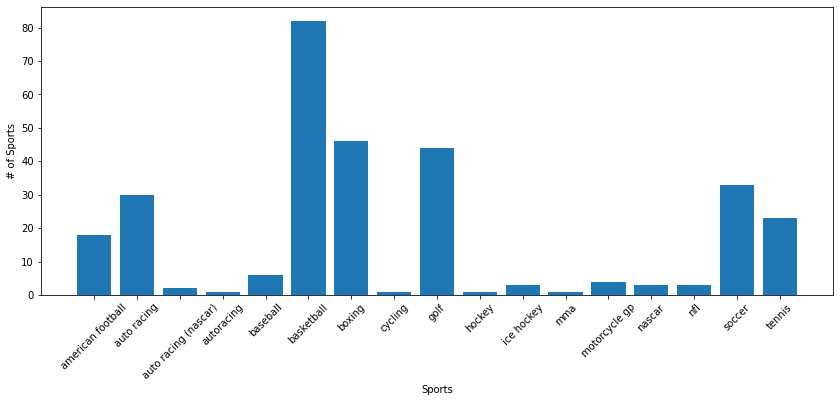

In [66]:
data.remove_rows_with_missing_values()
sports = data.get_column("Sport")
money = data.get_column("earnings_($ million)")
for i in range(len(sports)):
    sports[i] = sports[i].lower()
sport_value, sport_counts = myutils.get_frequencies(sports)
sports_split = utils.split_string_count(sports)
unique_sports = utils.get_genres(sports_split)
total_scores = utils.divide_ratings(unique_sports, sports, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_frequency_diagram_bar(sport_value, sport_counts, "Frequency of Sports", "Sports", "# of Sports")

### Nationality

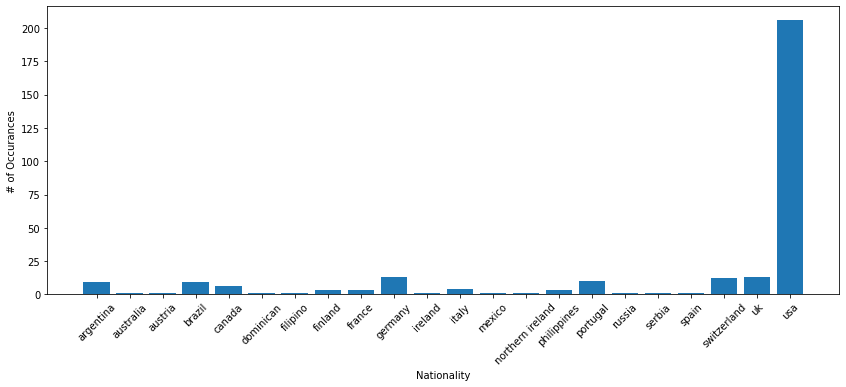

In [67]:
data.remove_rows_with_missing_values()
nationality = data.get_column("Nationality")
money = data.get_column("earnings_($ million)")
for i in range(len(nationality)):
    nationality[i] = nationality[i].lower()
nationality_value, nationality_counts = myutils.get_frequencies(nationality)
nationality_split = utils.split_string_count(nationality)
unique_nationalities = utils.get_genres(nationality_split)
total_scores = utils.divide_ratings(unique_nationalities, nationality, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_frequency_diagram_bar(nationality_value, nationality_counts, "Frequency of Nationalities", "Nationality", "# of Occurances")

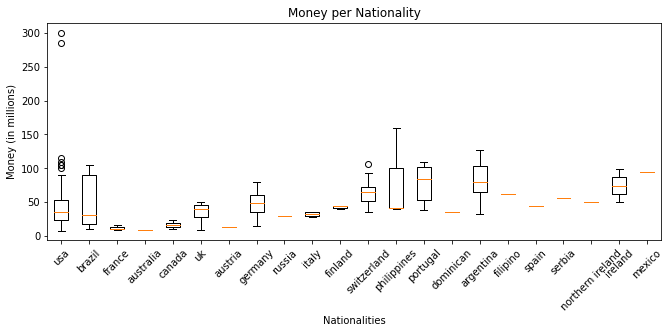

In [68]:
data.remove_rows_with_missing_values()
nationality = data.get_column("Nationality")
money = data.get_column("earnings_($ million)")
for i in range(len(nationality)):
    nationality[i] = nationality[i].lower()
nationality_split = utils.split_string_count(nationality)
unique_nationalities = utils.get_genres(nationality_split)
total_scores = utils.divide_ratings(unique_nationalities, nationality, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_box_plot(total_scores, unique_nationalities, "Nationalities", "Money (in millions)", "Money per Nationality")

### KNN Classifier

In [69]:
knn = MyKNeighborsClassifier(n_neighbors=10)
knn_combined_data = []
sport_values, sport_counts = utils.get_frequencies(data.data, data.column_names, "Sport")
country_values, country_counts = utils.get_frequencies(data.data, data.column_names, "Nationality")
# make all lower to stay consistent with other tags
for i in range(len(sport_values)):
    sport_values[i] = sport_values[i].lower()
for i in range(len(country_values)):
    country_values[i] = country_values[i].lower()
knn_X_train = X_train.copy()
knn_X_test = X_test.copy()
# transform the sports and nationalities to numbers
for index, value in enumerate(sport_values):
    for row in range(len(knn_X_test)):
        if knn_X_test[row][1] == value:
            knn_X_test[row][1] = index + 1
    for row in range(len(knn_X_train)):
        if knn_X_train[row][1] == value:
            knn_X_train[row][1] = index + 1
for index, single_country in enumerate(country_values):
    for row in range(len(knn_X_test)):
        if knn_X_test[row][0] == single_country:
            knn_X_test[row][0] = index + 1
    for row in range(len(knn_X_train)):
        if knn_X_train[row][0] == single_country:
            knn_X_train[row][0] = index + 1
knn.fit(knn_X_train, y_train)
knn_y_pred = knn.predict(knn_X_test)

### Naive Bayes Classifier

In [70]:
new_Xtrain = []
new_Xtest = []
for item in X_train:
    new_Xtrain.append(item)
for item in X_train:
    new_Xtest.append(item)
nbc = MyNaiveBayesClassifier()
nbc.fit(new_Xtrain, y_train)
nbc_y_pred = nbc.predict(new_Xtest)
for y in range(len(nbc_y_pred)):
    if nbc_y_pred[y] == 0:
        nbc_y_pred[y] = "low"
    if nbc_y_pred[y] == 1:
        nbc_y_pred[y] = "medium"
    if nbc_y_pred[y] == 2:
        nbc_y_pred[y] = "high"

### Dummy Classifier

In [71]:
dc = MyDummyClassifier()
dc.fit(X_train, y_train)
dc_y_pred = dc.predict(X_test)

### Random Forest Classifier

In [72]:
# TODO: Random forest

# Classification Results

## Dummy Statistics

In [73]:
dc_accuracy = myevaluation.accuracy_score(y_true, dc_y_pred)
dc_bps = myevaluation.binary_precision_score(y_true, dc_y_pred)
dc_brs = myevaluation.binary_recall_score(y_true, dc_y_pred)
dc_bfone = myevaluation.binary_f1_score(y_true, dc_y_pred)
print("Accuracy:", dc_accuracy)
print("Error Rate", 1 - dc_accuracy)
print("Binary Precision Score:", dc_bps)
print("Binary Recall Score:", dc_brs)
print("Binary F1 Score:", dc_bfone)

Accuracy: 0.3063063063063063
Error Rate 0.6936936936936937
Binary Precision Score: 0.3063063063063063
Binary Recall Score: 1.0
Binary F1 Score: 0.4689655172413793


## KNN Statistics

In [74]:
knn_accuracy = myevaluation.accuracy_score(y_true, knn_y_pred)
knn_bps = myevaluation.binary_precision_score(y_true, knn_y_pred)
knn_brs = myevaluation.binary_recall_score(y_true, knn_y_pred)
knn_bfone = myevaluation.binary_f1_score(y_true, knn_y_pred)
print("Accuracy:", knn_accuracy)
print("Error Rate", 1 - knn_accuracy)
print("Binary Precision Score:", knn_bps)
print("Binary Recall Score:", knn_brs)
print("Binary F1 Score:", knn_bfone)

Accuracy: 0.36936936936936937
Error Rate 0.6306306306306306
Binary Precision Score: 0.2972972972972973
Binary Recall Score: 0.2
Binary F1 Score: 0.2391304347826087


## Naive Bayes Statistics

In [75]:
nb_accuracy = myevaluation.accuracy_score(y_true, nbc_y_pred)
nb_bps = myevaluation.binary_precision_score(y_true, nbc_y_pred)
nb_brs = myevaluation.binary_recall_score(y_true, nbc_y_pred)
nb_bfone = myevaluation.binary_f1_score(y_true, nbc_y_pred)
print("Accuracy:", nb_accuracy)
print("Error Rate", 1 - nb_accuracy)
print("Binary Precision Score:", nb_bps)
print("Binary Recall Score:", nb_brs)
print("Binary F1 Score:", nb_bfone)

Accuracy: 0.3063063063063063
Error Rate 0.6936936936936937
Binary Precision Score: 0.3
Binary Recall Score: 0.08695652173913043
Binary F1 Score: 0.1348314606741573


## Random Forest Statisticts

In [60]:
rf_accuracy = myevaluation.accuracy_score(y_true, rf_y_pred)
rf_bps = myevaluation.binary_precision_score(y_true, rf_y_pred)
rf_brs = myevaluation.binary_recall_score(y_true, rf_y_pred)
rf_bfone = myevaluation.binary_f1_score(y_true, rf_y_pred)
print("Accuracy:", rf_accuracy)
print("Error Rate", 1 - rf_accuracy)
print("Binary Precision Score:", rf_bps)
print("Binary Recall Score:", rf_brs)
print("Binary F1 Score:", rf_bfone)

NameError: name 'rf_y_pred' is not defined